In [1]:
import nltk
from nltk.corpus import gutenberg
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout,GRU,Bidirectional
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [3]:
data=gutenberg.raw('shakespeare-hamlet.txt')

with open('shakespeare-hamlet.txt', 'w') as f:
    data = f.write(data)

In [4]:
with open('shakespeare-hamlet.txt','r') as f:
    text=f.read().lower()

In [5]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts([text])

In [6]:
total_words=len(tokenizer.word_index)+1
print(total_words)

4818


In [7]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'to': 3,
 'of': 4,
 'i': 5,
 'you': 6,
 'a': 7,
 'my': 8,
 'it': 9,
 'in': 10,
 'that': 11,
 'ham': 12,
 'is': 13,
 'not': 14,
 'his': 15,
 'this': 16,
 'with': 17,
 'your': 18,
 'but': 19,
 'for': 20,
 'me': 21,
 'lord': 22,
 'as': 23,
 'what': 24,
 'he': 25,
 'be': 26,
 'so': 27,
 'him': 28,
 'haue': 29,
 'king': 30,
 'will': 31,
 'no': 32,
 'our': 33,
 'we': 34,
 'on': 35,
 'are': 36,
 'if': 37,
 'all': 38,
 'then': 39,
 'shall': 40,
 'by': 41,
 'thou': 42,
 'come': 43,
 'or': 44,
 'hamlet': 45,
 'good': 46,
 'do': 47,
 'hor': 48,
 'her': 49,
 'let': 50,
 'now': 51,
 'thy': 52,
 'how': 53,
 'more': 54,
 'they': 55,
 'from': 56,
 'enter': 57,
 'at': 58,
 'was': 59,
 'oh': 60,
 'like': 61,
 'most': 62,
 'there': 63,
 'well': 64,
 'know': 65,
 'selfe': 66,
 'would': 67,
 'them': 68,
 'loue': 69,
 'may': 70,
 "'tis": 71,
 'vs': 72,
 'sir': 73,
 'qu': 74,
 'which': 75,
 'did': 76,
 'why': 77,
 'laer': 78,
 'giue': 79,
 'thee': 80,
 'ile': 81,
 'must': 82,
 'hath': 

In [8]:
input_sequence = []
lines = text.split('\n')  # Split text into lines

for line in lines:
    # Convert line to tokens (e.g., ["hello", "world"] → [3, 8])
    tokens = tokenizer.texts_to_sequences([line])[0]  
    
    # Create sequences of length 2, 3, 4, ... up to full line
    for end_index in range(2, len(tokens) + 1):
        sequence = tokens[:end_index]  # Slice tokens from start to end_index
        input_sequence.append(sequence)

In [9]:
input_sequence

[[1, 687],
 [1, 687, 4],
 [1, 687, 4, 45],
 [1, 687, 4, 45, 41],
 [1, 687, 4, 45, 41, 1886],
 [1, 687, 4, 45, 41, 1886, 1887],
 [1, 687, 4, 45, 41, 1886, 1887, 1888],
 [1180, 1889],
 [1180, 1889, 1890],
 [1180, 1889, 1890, 1891],
 [57, 407],
 [57, 407, 2],
 [57, 407, 2, 1181],
 [57, 407, 2, 1181, 177],
 [57, 407, 2, 1181, 177, 1892],
 [407, 1182],
 [407, 1182, 63],
 [408, 162],
 [408, 162, 377],
 [408, 162, 377, 21],
 [408, 162, 377, 21, 247],
 [408, 162, 377, 21, 247, 882],
 [18, 66],
 [451, 224],
 [451, 224, 248],
 [451, 224, 248, 1],
 [451, 224, 248, 1, 30],
 [408, 407],
 [451, 25],
 [408, 6],
 [408, 6, 43],
 [408, 6, 43, 62],
 [408, 6, 43, 62, 1893],
 [408, 6, 43, 62, 1893, 96],
 [408, 6, 43, 62, 1893, 96, 18],
 [408, 6, 43, 62, 1893, 96, 18, 566],
 [451, 71],
 [451, 71, 51],
 [451, 71, 51, 1894],
 [451, 71, 51, 1894, 567],
 [451, 71, 51, 1894, 567, 378],
 [451, 71, 51, 1894, 567, 378, 80],
 [451, 71, 51, 1894, 567, 378, 80, 3],
 [451, 71, 51, 1894, 567, 378, 80, 3, 273],
 [451, 71

In [10]:
max_seq_len = 0  # Initialize the maximum length
for x in input_sequence:
    current_len = len(x)
    if current_len > max_seq_len:
        max_seq_len = current_len
print(max_seq_len)

14


In [11]:
input_sequence=np.array(pad_sequences(input_sequence,maxlen=max_seq_len,padding='post'))
input_sequence

array([[   1,  687,    0, ...,    0,    0,    0],
       [   1,  687,    4, ...,    0,    0,    0],
       [   1,  687,    4, ...,    0,    0,    0],
       ...,
       [4817,    1,  687, ...,    0,    0,    0],
       [4817,    1,  687, ...,    0,    0,    0],
       [4817,    1,  687, ...,    0,    0,    0]], dtype=int32)

In [12]:
# Split into input (x) and target (y) 
x = input_sequence[:, :-1]  # All tokens except last
y = input_sequence[:, 1:]   # All tokens except first (correct next-word prediction)

# Convert y to one-hot encoding
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

In [13]:
x

array([[   1,  687,    0, ...,    0,    0,    0],
       [   1,  687,    4, ...,    0,    0,    0],
       [   1,  687,    4, ...,    0,    0,    0],
       ...,
       [4817,    1,  687, ...,    0,    0,    0],
       [4817,    1,  687, ...,    0,    0,    0],
       [4817,    1,  687, ...,    0,    0,    0]], dtype=int32)

In [14]:
y

array([[[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0.

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

### GRU

In [16]:
# model=Sequential()
# model.add(Embedding(total_words,100))
# model.add(GRU(150,return_sequences=True))
# model.add(Dropout(0.3))
# model.add(GRU(100,return_sequences=True))
# model.add(GRU(100,return_sequences=True))
# model.add(Dropout(0.3))
# model.add(Dense(total_words,activation='softmax'))

### LSTM

In [17]:
# model=Sequential()
# model.add(Embedding(total_words,100))
# model.add(LSTM(150,return_sequences=True))
# model.add(Dropout(0.3))
# model.add(LSTM(100,return_sequences=True))
# model.add(LSTM(100,return_sequences=True))
# model.add(Dropout(0.3))
# model.add(Dense(total_words,activation='softmax'))

### LSTM Bidirectional

In [18]:
model=Sequential()
model.add(Embedding(total_words,100))
model.add(Bidirectional(LSTM(150,return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100,return_sequences=True)))
model.add(Bidirectional(LSTM(100,return_sequences=True)))
model.add(Dropout(0.3))
model.add(Dense(total_words,activation='softmax'))

### GRU Bidirectional

In [19]:
# model=Sequential()
# model.add(Embedding(total_words,100))
# model.add(Bidirectional(GRU(150,return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(Bidirectional(GRU(100,return_sequences=True)))
# model.add(Bidirectional(GRU(100,return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(Dense(total_words,activation='softmax'))

In [20]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [21]:
early_stopping=EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)

In [22]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 55s 83ms/step - accuracy: 0.6680 - loss: 3.0327 - val_accuracy: 0.6874 - val_loss: 2.0904
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 38s 68ms/step - accuracy: 0.6863 - loss: 2.0800 - val_accuracy: 0.6889 - val_loss: 1.9268
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 39s 69ms/step - accuracy: 0.6919 - loss: 1.7908 - val_accuracy: 0.7125 - val_loss: 1.5502
Epoch 4/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 39s 69ms/step - accuracy: 0.7145 - loss: 1.4952 - val_accuracy: 0.7392 - val_loss: 1.3471
Epoch 5/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 38s 68ms/step - accuracy: 0.7412 - loss: 1.2865 - val_accuracy: 0.7883 - val_loss: 1.1201
Epoch 6/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 39s 69ms/step - accuracy: 0.7988 - loss: 1.0233 - val_accuracy: 0.8499 - val_loss: 0.8405
Epoch 7/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 40s 71ms/step - accuracy: 0.8459 - loss: 0.7847 - val_accuracy: 0.8755 - val_loss: 0.6916
Epoch 8/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 38s 68ms/step - accuracy: 0.8761 - loss: 0

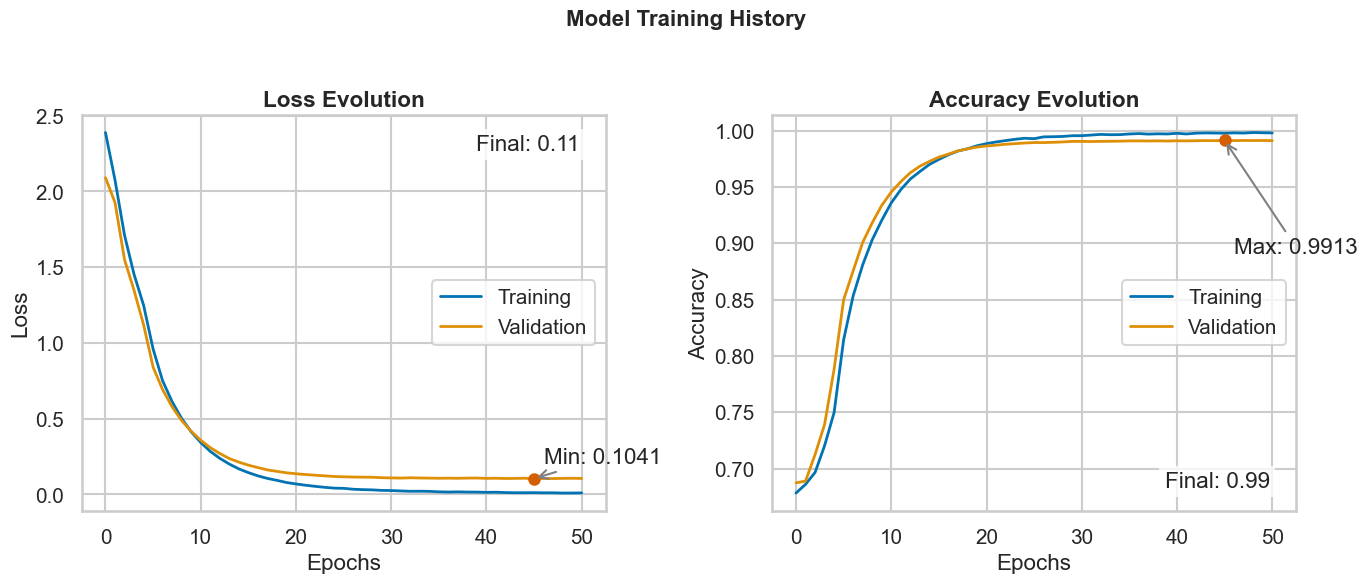

In [23]:
# Apply seaborn style
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.9)
palette = sns.color_palette("colorblind")

# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Model Training History', fontsize=16, fontweight='bold')

# Plot loss
sns.lineplot(x=range(len(history.history['loss'])), 
             y=history.history['loss'], 
             ax=ax1, color=palette[0], label='Training', linewidth=2)
sns.lineplot(x=range(len(history.history['val_loss'])), 
             y=history.history['val_loss'], 
             ax=ax1, color=palette[1], label='Validation', linewidth=2)

# Highlight min validation loss
min_idx = history.history['val_loss'].index(min_val := min(history.history['val_loss']))
ax1.plot(min_idx, min_val, 'o', markersize=8, color=palette[3])
ax1.annotate(f'Min: {min_val:.4f}', (min_idx, min_val),
            xytext=(min_idx+1, min_val+0.1),
            arrowprops=dict(arrowstyle="->", color='gray'))

ax1.set_title('Loss Evolution', fontweight='bold')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Final loss annotation
ax1.text(0.95, 0.95, f'Final: {history.history["val_loss"][-1]:.2f}', 
         transform=ax1.transAxes, ha='right', va='top',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Plot accuracy if available
if 'accuracy' in history.history:
    sns.lineplot(x=range(len(history.history['accuracy'])), 
                 y=history.history['accuracy'], 
                 ax=ax2, color=palette[0], label='Training', linewidth=2)
    sns.lineplot(x=range(len(history.history['val_accuracy'])), 
                 y=history.history['val_accuracy'], 
                 ax=ax2, color=palette[1], label='Validation', linewidth=2)
    
    # Highlight max validation accuracy
    max_idx = history.history['val_accuracy'].index(max_acc := max(history.history['val_accuracy']))
    ax2.plot(max_idx, max_acc, 'o', markersize=8, color=palette[3])
    ax2.annotate(f'Max: {max_acc:.4f}', (max_idx, max_acc),
                xytext=(max_idx+1, max_acc-0.1),
                arrowprops=dict(arrowstyle="->", color='gray'))
    
    ax2.set_title('Accuracy Evolution', fontweight='bold')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    
    # Final accuracy annotation
    ax2.text(0.95, 0.05, f'Final: {history.history["val_accuracy"][-1]:.2f}', 
             transform=ax2.transAxes, ha='right', va='bottom',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
else:
    ax2.remove()

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle
plt.savefig('Bidirectional_LSTM.png', dpi=150, bbox_inches='tight')
plt.show()

In [24]:
model.save('Bidirectional_LSTM.keras')